## **Setup and Imports**




In [1]:
# Import necessary libraries
import pickle
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Mount Google Drive and Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/My Drive/Fall 2025/EE 250/Labs')

from google.colab import files
files.upload()

[f for f in os.listdir() if 'coin' in f.lower()] # Just to check you have coins.csv and noisy_coins.csv in the right location!

['coins.csv', 'noisy_coins.csv']

## **Dataset Visualization**

In [4]:
# Load the dataset 'coins.csv' using pandas' read_csv function.
# Make sure coins.csv is in the directory where you're using Jupyter
# If using Google Colab, upload the coins file to the directory by usinf upload in the toolbar on the left
coins = pd.read_csv('coins.csv')
coins.tail(5)

,reflectance,weight,denomination
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


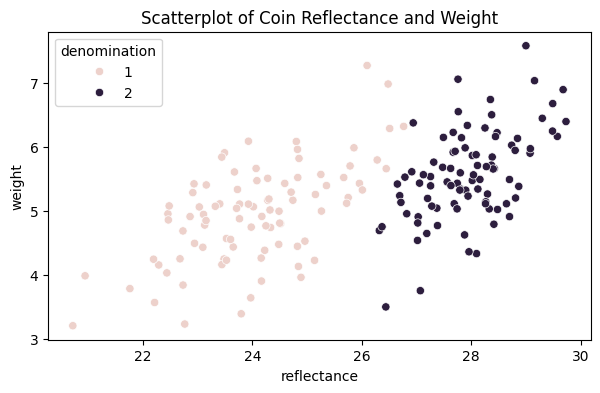

In [5]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight")
plt.show()

## **Data Preparation**

In [6]:
# [STUDENT SECTION: Prepare the data for training and testing]

# Prepare the input features (X)
X = coins[["reflectance", "weight"]].to_numpy()

# Convert the denomination values (1 and 2) to binary labels (0 and 1) for binary classification.
# Hint: Subtract 1 from the denomination values to convert them to 0 and 1.
y = (coins["denomination"] - 1).to_numpy()

# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments

# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()
# Use the scaler's fit_transform and transform methods to standardize the training and testing features.
#  (See https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Build and Train the Model**

In [7]:
# [STUDENT SECTION: Define and compile the model]
# Instantiate and Train the Model
# - Build a neural network model using TensorFlow/Keras.
# - The model should have:
#    - An input layer with 2 input features (reflectance and weight).
#    - 1 or 2 hidden layers with the number of neurons at your discretion (use 'relu' activation).
#      (Experiment to find the best accuracy)
#    - An output layer with 1 neuron and 'sigmoid' activation for binary classification.
model = Sequential([
    Input(shape=(2,)), # First layer, has 2 input features
    Dense(16, activation='relu'), # Hidden layer with 16 neurons
    Dense(8, activation='relu'), # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid') # Output layer
])

# - Compile the model using Adam optimizer with a learning rate of 0.001,
#   binary_crossentropy as the loss function, and 'accuracy' as the metric.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#the above has nice accuracy


# - Train the model using X_train and y_train.
#    - Set validation_split to 0.2.
#    - Use EarlyStopping with patience=5 to prevent overfitting.
#    - Train the model for 100 epochs and use a batch size of 32.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# call the appropriate function to train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.5331 - loss: 0.7233 - val_accuracy: 0.4483 - val_loss: 0.7621
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5716 - loss: 0.6938 - val_accuracy: 0.4483 - val_loss: 0.7379
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5039 - loss: 0.6883 - val_accuracy: 0.4483 - val_loss: 0.7146
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5904 - loss: 0.6449 - val_accuracy: 0.4483 - val_loss: 0.6926
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4862 - loss: 0.6720 - val_accuracy: 0.4483 - val_loss: 0.6709
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5199 - loss: 0.6366 - val_accuracy: 0.4483 - val_loss: 0.6500
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5120 - loss: 0.6305 - val_accuracy: 0.4483 - val_loss: 0.6295
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5245 - loss: 0.6159 - val_accuracy: 0.4828 - val_loss

## **Evaluate the Model**

**experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [8]:
# [STUDENT SECTION: Evaluate the model]
# Hint:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Receiving 100% accuracy, likely overfit


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0679
Model Accuracy: 100.00%


222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


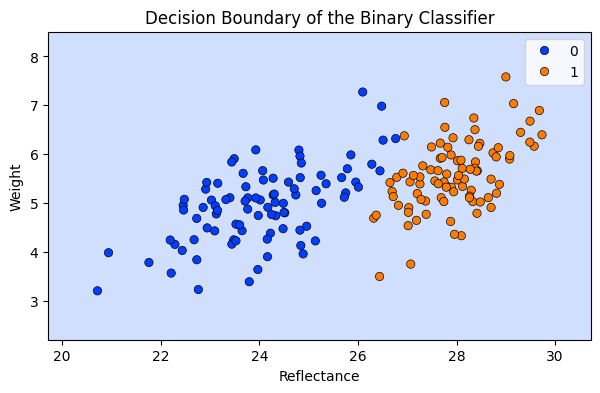

In [9]:
# Plot the Decision Boundary:
# - Define a function to plot the decision boundary of the trained model. This function should take in the feature matrix X, the labels y, and the trained model.
# - This function should:
#    - Generate a mesh grid over the feature space (reflectance and weight).
#    - Use the model to predict labels for each point in the mesh grid.
#    - Plot the decision boundary using contourf.
#    - Overlay the training data points using seaborn's scatterplot.
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='bright', edgecolor="k")
    plt.xlabel('Reflectance')
    plt.ylabel('Weight')
    plt.title('Decision Boundary of the Binary Classifier')
    plt.show()


# [STUDENT SECTION: Call the function to plot the decision boundary by passing the correct arguments]
plot_decision_boundary(X, y, model)




In [10]:
# Save the Trained Model:
# - Save the trained model to a file named 'model.h5' using model.save().
model.save('model.h5')

# [STUDENT SECTION: Save the model]

# Load the Saved Model and Use it to evaluate the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
saved_model = tf.keras.models.load_model('model.h5')
loss, accuracy = saved_model.evaluate(X_test, y_test)
print(f"Saved Model Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0679 
Saved Model Accuracy: 100.00%


In [11]:
# [STUDENT SECTION: Evaluate the loaded model on the test data]
# the accuracy of the loaded model on the test data.  Examine the output
# of predict and think about how to compute the accuracy of the predictions using
# the y_test data.  Hint:  You may need to round the predictions to 0 or 1 using np.round()
# When you use model.predict() in a binary classification problem, the output is usually
# a 2D array where each element is a list containing a single predicted probability
# (e.g., [[0.1], [0.9], [0.3], ...]). To compare these predictions to your 1D y_test array
# (e.g., [0, 1, 0, ...]), you need to "flatten()" the 2D array into a 1D array.
predictions = saved_model.predict(X_test) # Prints out {.002, .006, .929, .960, ...}
rounded_predictions = np.round(predictions).flatten()
accuracy = np.mean(rounded_predictions == y_test)

# Print the accuracy of the loaded model on the test data
print(f"Manual Saved Model Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Manual Saved Model Accuracy: 100.00%


### **Eval on noisy data**

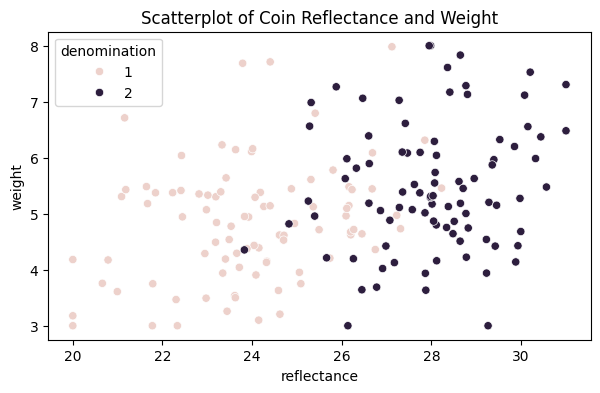

In [12]:

# In this section, you’ll test how well your trained model performs when the data isn't perfectly clean.
#  - The goal is to see whether your model can still correctly classify coins when there’s noise (for example, small measurement errors or variations in reflectance/weight).
noisy_coins = pd.read_csv('noisy_coins.csv')

# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=noisy_coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight")
plt.show()


In [15]:
#Prepare features and labels
# - Extract the same features as before: reflectance and weight.
# - Convert the denomination column (1/2) into binary labels (0/1).
# - IMPORTANT: Use the SAME StandardScaler (scaler) that you used for training.
#   This ensures both datasets are normalized in the same way.
X = noisy_coins[["reflectance", "weight"]].to_numpy()
y = (noisy_coins["denomination"] - 1).to_numpy()
X = scaler.transform(X)

#Predict and evaluate
# - The model will output probabilities between 0 and 1.
# - Convert these probabilities into binary predictions using a threshold of 0.5.
predictions = saved_model.predict(X)
rounded_predictions = np.round(predictions).flatten()
accuracy = np.mean(rounded_predictions == y)

# Print the accuracy of the loaded model on the test data
print(f"Noisy Model Accuracy: {accuracy * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Noisy Model Accuracy: 85.47%


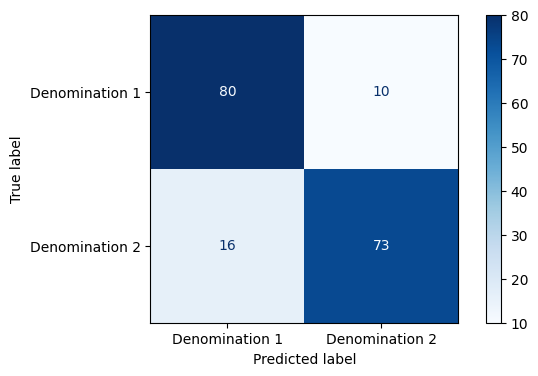

Precision: 0.88
Recall: 0.82
F1-score: 0.85


In [14]:
# Generate and visualize confusion matrix
# - Add the needed libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# - The confusion matrix shows how many samples were correctly or incorrectly classified.
# - Rows correspond to TRUE labels; columns correspond to PREDICTED labels.
cm = confusion_matrix(y, rounded_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Denomination 1", "Denomination 2"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print precision, recall, and F1-score
precision = precision_score(y, rounded_predictions)
recall = recall_score(y, rounded_predictions)
f1 = f1_score(y, rounded_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")